# Analyse sondage initial du Mooc Recherche reproductible - Session 3
A partir d'un fichier exporté depuis https://fun-mooc.limequery.com/admin/export/sa/exportresults/surveyid/673681
contenant toutes les réponses au format csv (à renseigner dans la variable ```fichier_export_sondage_init```).  
Attention, exporter/csv/réponses complètes uniquement/Texte complet de la question


In [2]:
## Projet Maman

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

def printBold(string):
    printmd('**' + string + '**')

fichier_export_sondage_init="results-survey_initial_2020-04-09.csv"
donnees = pd.read_csv(fichier_export_sondage_init)
print (f"Nombre de répondants Total =  {donnees.loc[:,'Indiquez votre genre :'].count()}")
#print (donnees.head())

Nombre de répondants Total =  445


**Indiquez votre genre :**

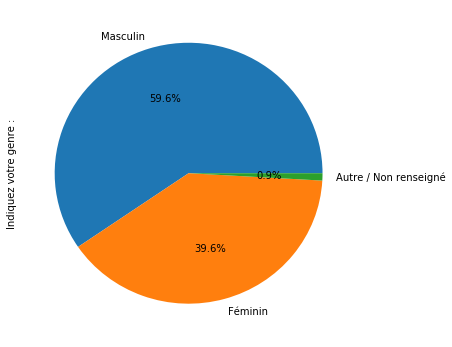

In [3]:
## D01FUN
libelleGenre='Indiquez votre genre :'
printBold (libelleGenre)
donnees[libelleGenre].value_counts().plot(kind='pie',figsize = (6, 6),autopct='%1.1f%%')

#plt.figure(figsize = (8, 8))
#plt.pie(donnees[genre].value_counts(normalize=True),autopct='%1.1f%%')
plt.show()


**Quel est votre pays de résidence ?**

Uniquement si > 1%, Autres sinon


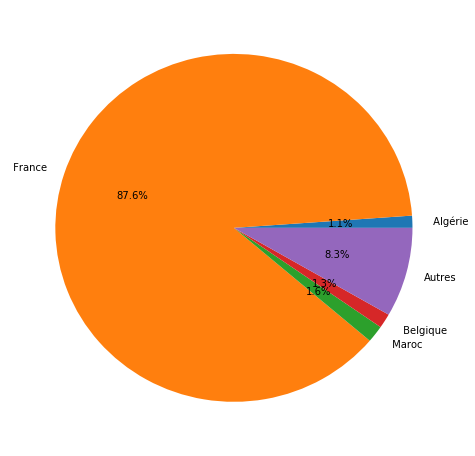

In [4]:
## D02FUN
libellePays='Quel est votre pays de résidence ?'
printBold (libellePays)
print ("Uniquement si > 1%, Autres sinon")
donnees_pays=donnees.loc[:,libellePays]
liste_pays=list(set(donnees_pays))
dico_pays={}
for pays in liste_pays:
    dico_pays[pays]=len(donnees.loc[donnees.loc[:,libellePays]==pays,libellePays])
dico_pays_bis={}
valeur_totale=0
for key,value in dico_pays.items():
    if value/(sum(dico_pays.values()))*100>1:
        dico_pays_bis[key]=value
    else:
        valeur_totale=valeur_totale+value
dico_pays_bis['Autres']=valeur_totale


plt.figure(figsize = (8, 8))
plt.pie(dico_pays_bis.values(), autopct='%1.1f%%',  labels = dico_pays_bis.keys())
plt.show()

**Quelle est votre année de naissance ?**

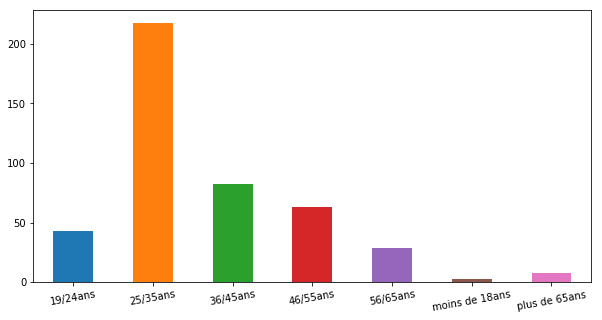

In [5]:
## D04FUN
libelleAge='Quelle est votre année de naissance ?'
printBold(libelleAge)
donnees_age=donnees.loc[:,libelleAge].count()
a=donnees.loc[donnees.loc[:,libelleAge] >= 2002,libelleAge].count()
b=donnees.loc[donnees.loc[:,libelleAge] >= 2020-24,libelleAge].count()
c=donnees.loc[donnees.loc[:,libelleAge] >= 2020-35,libelleAge].count()
d=donnees.loc[donnees.loc[:,libelleAge] >= 2020-45,libelleAge].count()
e=donnees.loc[donnees.loc[:,libelleAge] >= 2020-55,libelleAge].count()
f=donnees.loc[donnees.loc[:,libelleAge] >= 2020-65,libelleAge].count()
g=donnees.loc[donnees.loc[:,libelleAge] < 2020-65,libelleAge].count()
dico_age={'moins de 18ans':a,'19/24ans':b-a ,'25/35ans':c-b,'36/45ans':d-c,'46/55ans':e-d,'56/65ans':f-e,'plus de 65ans':g}

plt.figure(figsize = (10, 5))
pd.Series(dico_age).plot(kind='bar',rot=10)
plt.show()

**Quel est votre niveau de formation ?**

{nan: 0, 'DEUG / L1-L2': 2, 'Doctorat': 168, 'Licence': 22, 'Baccalauréat': 2, "Master / Diplôme d'ingénieur": 233, 'DUT / BTS': 13, 'Autres études': 3, 'Brevet des collèges': 2}


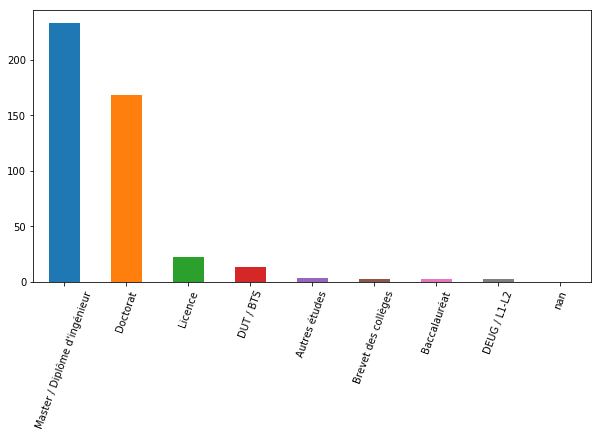

In [6]:
## D05FUN
libelleFormation='Quel est votre niveau de formation ?'
printBold (libelleFormation)
donnees_formation=donnees.loc[:,libelleFormation]
liste_formation=list(set(donnees_formation))
dico_formation={}
for formation in liste_formation:
    dico_formation[formation]=len(donnees.loc[donnees.loc[:,libelleFormation]==formation,libelleFormation])
print(dico_formation)

plt.figure(figsize = (10, 5))
pd.Series(dico_formation).sort_values(ascending=False).plot.bar(rot=70)
plt.show()

**Quelle est votre langue maternelle ?**

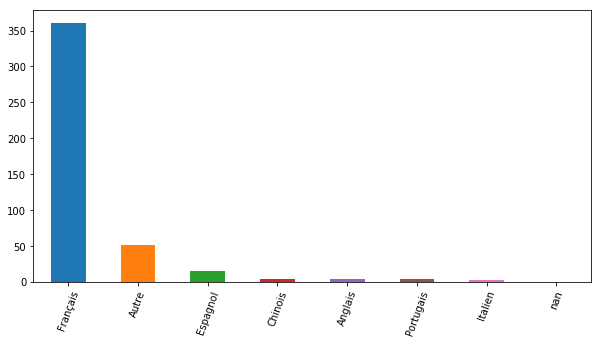

In [7]:
## D06FUN
libelleLangue="Quelle est votre langue maternelle ? "
printBold(libelleLangue.strip())
donnees_langue=donnees.loc[:,libelleLangue]
liste_langue=list(set(donnees_langue))
dico_langue={}
for langue in liste_langue:
    dico_langue[langue]=len(donnees.loc[donnees.loc[:,libelleLangue]==langue,libelleLangue])

plt.figure(figsize = (10, 5))
pd.Series(dico_langue).sort_values(ascending=False).plot.bar(rot=70)
plt.show()

**Pourquoi suivez-vous ce MOOC ?**

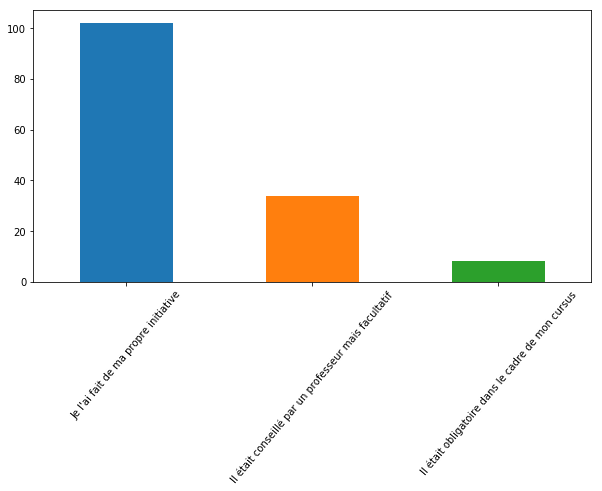

In [8]:
## D07FUNC01
libelleRaison='Pourquoi suivez-vous ce MOOC ?'
printBold(libelleRaison)
donnees_raison=donnees.loc[:,libelleRaison]
liste_raison=list(set(donnees_raison))
del liste_raison[liste_raison.index(np.nan)]
dico_raison={}
for raison in liste_raison:
    dico_raison[raison]=len(donnees.loc[donnees.loc[:,libelleRaison]==raison,libelleRaison])

plt.figure(figsize = (10, 5))
pd.Series(dico_raison).sort_values(ascending=False).plot(kind='bar',rot=50)
plt.show()

**Ce MOOC vous apporte-t-il des points ECTS par rapport à un cursus ?**

Pour les étudiants uniquement :
Ce MOOC vous apporte-t-il des points ECTS par rapport à un cursus ? : Nombre de répondants =  142


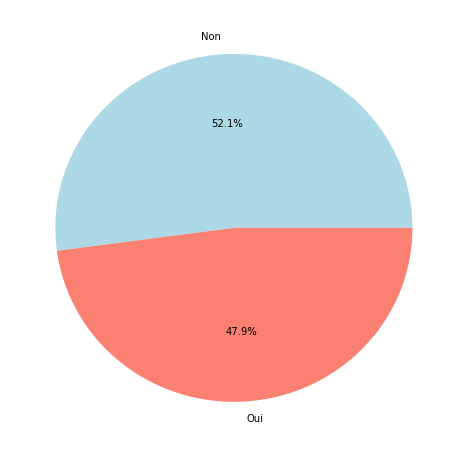

In [9]:
## D07FUNC02
libelle_ects='Ce MOOC vous apporte-t-il des points ECTS par rapport à un cursus ?'
printBold(libelle_ects)
donnees_ects=donnees.loc[:,libelle_ects]
liste_ects=list(set(donnees_ects))
dico_ects={}
del liste_ects[liste_ects.index(np.nan)]
for ects in liste_ects:
    dico_ects[ects]=len(donnees.loc[donnees.loc[:,libelle_ects]==ects,libelle_ects])
print("Pour les étudiants uniquement :")
print (f"{libelle_ects} : Nombre de répondants =  {donnees.loc[:,libelle_ects].count()}")

plt.figure(figsize = (8, 8))
plt.pie(dico_ects.values(),labels=dico_ects.keys(),colors=['lightblue','salmon'],autopct='%1.1f%%')
plt.show()

**Comment avez-vous eu connaissance de ce MOOC ?**

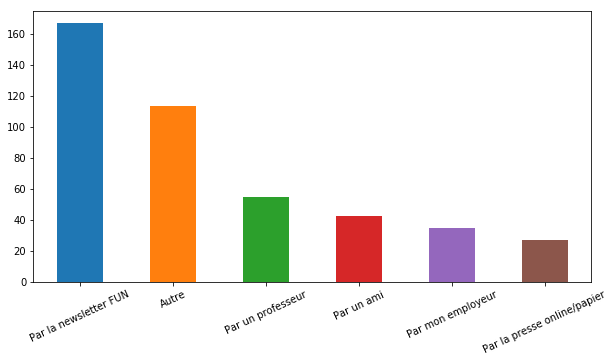

In [27]:
## D008FUN
libelle_connaissance='Comment avez-vous eu connaissance de ce MOOC ?'
donnees_connaissance=donnees.loc[:,libelle_connaissance].dropna()
printBold(libelle_connaissance)
liste_connaissance=list(set(donnees_connaissance))
dico_connaissance={}
for connaissance in liste_connaissance:
    dico_connaissance[connaissance]=len(donnees.loc[donnees.loc[:,libelle_connaissance]==connaissance,libelle_connaissance])
plt.figure(figsize=(10,5))
pd.Series(dico_connaissance).sort_values(ascending=False).plot(kind='bar', rot = 25)
plt.show()

**Est-ce le premier MOOC que vous suivez ?**

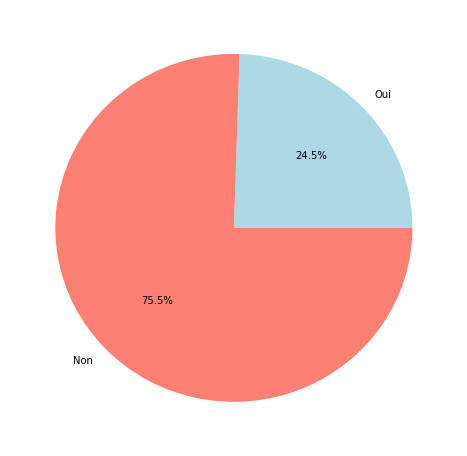

In [11]:
## D009FUN
libelle_premier_mooc="Est-ce le premier MOOC que vous suivez ?\xa0"
printBold("Est-ce le premier MOOC que vous suivez ?")
oui=donnees.loc[donnees.loc[:,libelle_premier_mooc]=='Oui',libelle_premier_mooc].count()
non=donnees.loc[donnees.loc[:,libelle_premier_mooc]=='Non',libelle_premier_mooc].count()

plt.figure(figsize = (8, 8))
plt.pie([oui,non],labels=['Oui','Non'],colors=['lightblue','salmon'],autopct='%1.1f%%')
plt.show()

##list(donnees.columns)


**Pour quelles raisons ce MOOC vous intéresse-t-il ?**

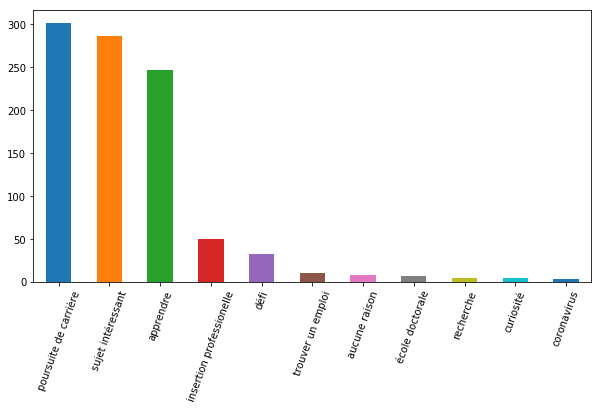

In [12]:
## D010FUN
libelle_raison="Pour quelles raisons ce MOOC vous intéresse-t-il ?"
printBold(libelle_raison)
apprendre=donnees.loc[donnees.loc[:,libelle_raison+" [Parce que j'éprouve du plaisir et de la satisfaction à apprendre de nouvelles choses]"]=='Oui',libelle_raison+" [Parce que j'éprouve du plaisir et de la satisfaction à apprendre de nouvelles choses]"].count()
sujet_interessant=donnees.loc[donnees.loc[:,libelle_raison+" [Parce que ce sujet m'intéresse particulièrement]"]=='Oui',libelle_raison+" [Parce que ce sujet m'intéresse particulièrement]"].count()
poursuite_carriere=donnees.loc[donnees.loc[:,libelle_raison+" [Parce que selon moi il va m'aider dans la poursuite de ma carrière]"]=='Oui',libelle_raison+" [Parce que selon moi il va m'aider dans la poursuite de ma carrière]"].count()
insertion_professionelle=donnees.loc[donnees.loc[:,libelle_raison+" [ Pour m'aider dans mon insertion professionnelle ]"]=='Oui',libelle_raison+" [ Pour m'aider dans mon insertion professionnelle ]"].count()
trouver_emploi=donnees.loc[donnees.loc[:,libelle_raison+" [ Pour m’aider à retrouver un emploi]"]=='Oui',libelle_raison+" [ Pour m’aider à retrouver un emploi]"].count()
defi=donnees.loc[donnees.loc[:,libelle_raison+" [Pour relever un défi]"]=='Oui',libelle_raison+" [Pour relever un défi]"].count()
aucune_raison=donnees.loc[donnees.loc[:,libelle_raison+" [Je n’ai pas de raison particulière]"]=='Oui',libelle_raison+" [Je n’ai pas de raison particulière]"].count()

liste_raison_autres=list(donnees.loc[donnees.loc[:,libelle_raison+" [Autre]"]!=np.nan,libelle_raison+" [Autre]"].dropna())
dico_raison_autres={"coronavirus":0,"curiosité":0,"école doctorale":0,"recherche":0}
for raison_autres in liste_raison_autres:
    if "coro" in raison_autres.lower() or "covi" in raison_autres.lower() or "confi" in raison_autres.lower():
        dico_raison_autres["coronavirus"]+=1
    if 'docto' in raison_autres.lower():
        dico_raison_autres["école doctorale"]+=1
    if 'rch' in raison_autres.lower() or 'thèse' in raison_autres.lower():
        dico_raison_autres["recherche"]+=1
    if 'curiosit' in raison_autres.lower() or 'générale' in raison_autres.lower() or "découverte" in raison_autres.lower() or "approche" in raison_autres.lower():
        dico_raison_autres["curiosité"]+=1


raisons=["apprendre","sujet intéressant","poursuite de carrière","insertion professionelle","trouver un emploi","défi","aucune raison"]+list(dico_raison_autres.keys())
nbr_raisons=[apprendre,sujet_interessant,poursuite_carriere,insertion_professionelle,trouver_emploi,defi,aucune_raison]+list(dico_raison_autres.values())
plt.figure(figsize=(10,5))
pd.Series(nbr_raisons,index=raisons).sort_values(ascending=False).plot(kind='bar',rot=70)
plt.show()

**Quel est votre niveau de connaissance sur le sujet ?**

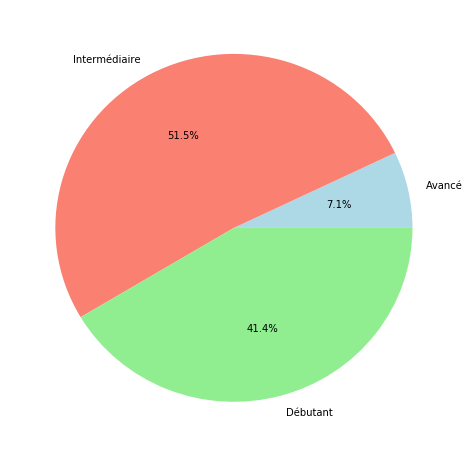

In [29]:
## D011FUN
libelle_niveau='Quel est votre niveau de connaissance sur le sujet ?'
printBold(libelle_niveau)
donnees_niveau=donnees.loc[:,libelle_niveau].dropna()
liste_niveau=list(set(donnees_niveau))
dico_niveau={}
for niveau in liste_niveau:
    dico_niveau[niveau]=donnees.loc[donnees.loc[:,libelle_niveau]==niveau,libelle_niveau].count()

plt.figure(figsize=(8,8))
plt.pie(dico_niveau.values(),labels=dico_niveau.keys(),colors=['lightblue','salmon','lightgreen'],autopct='%1.1f%%')
plt.show()

**Combien d'heures par semaine pensez-vous passer sur le MOOC ?**

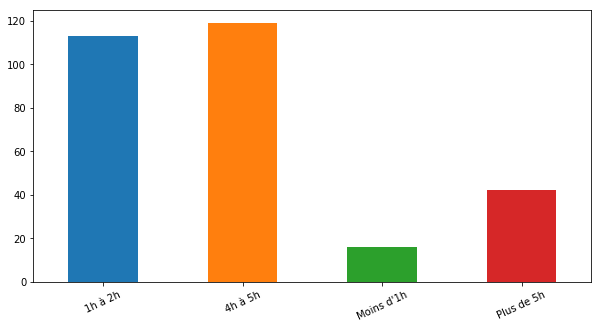

In [14]:
## D012FUN
libelle_nb_heures="Combien d'heures par semaine pensez-vous passer sur le MOOC ?"
printBold(libelle_nb_heures)
donnees_heures=donnees.loc[:,libelle_nb_heures]
liste_heures=["Moins d'1h",'1h à 2h', '4h à 5h', 'Plus de 5h']
dico_heures={}
for heures in liste_heures:
    dico_heures[heures]=len(donnees.loc[donnees.loc[:,libelle_nb_heures]==heures,libelle_nb_heures])

#plt.figure(figsize=(8,8))
#plt.pie(dico_heures.values(),labels=dico_heures.keys(),colors=['lightblue','salmon','lightgreen','violet','blanchedalmond'],autopct='%1.1f%%')
#plt.show()
plt.figure(figsize=(10,5))
pd.Series(dico_heures).plot(kind='bar', rot = 25)
plt.show()

**Avez-vous l'intention d'obtenir une attestation de suivi avec succès gratuite pour ce MOOC ?**

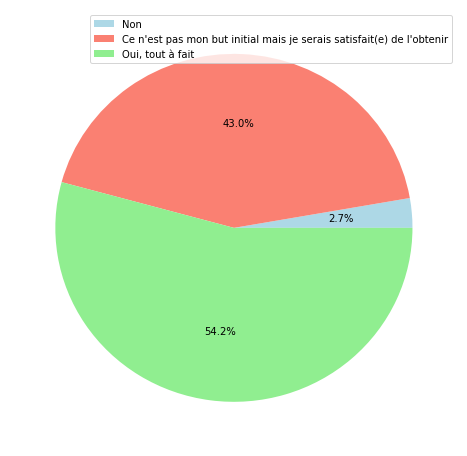

In [30]:
## D016FUN
libelle_attestation="Avez-vous l'intention d'obtenir une attestation de suivi avec succès gratuite pour ce MOOC ?"
printBold(libelle_attestation)
donnees_attestation=donnees.loc[:,libelle_attestation].dropna()
liste_attestation=list(set(donnees_attestation))
dico_attestation={}
for attestation in liste_attestation:
    dico_attestation[attestation]=len(donnees.loc[donnees.loc[:,libelle_attestation]==attestation,libelle_attestation])

plt.figure(figsize=(8,8))
plt.pie(dico_attestation.values(),colors=['lightblue','salmon','lightgreen','violet','blanchedalmond'],autopct='%1.1f%%')
plt.legend(dico_attestation.keys(),loc="upper right")
plt.show()

**Questions spécifiques au Mooc**

**Merci de nous préciser votre situation professionnelle.  Vous êtes actuellement :**

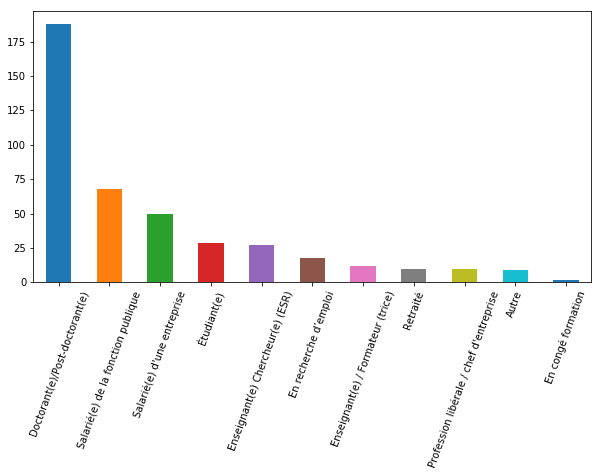

In [16]:
## DILLCurrentStatus
libelle_situation='Merci de nous préciser votre situation professionnelle.  Vous êtes actuellement : '
printBold('Questions spécifiques au Mooc')
printBold(libelle_situation.strip())
donnees_situation=donnees.loc[:,libelle_situation]
liste_situation=list(set(donnees_situation))
del liste_situation[liste_situation.index(np.nan)]
dico_situation={}
for situation in liste_situation:
    dico_situation[situation]=len(donnees.loc[donnees.loc[:,libelle_situation]==situation,libelle_situation])

a=pd.Series(dico_situation)
a_clé=list(a.keys())
a_clé[8]='Salarié(e) de la fonction publique'
a_clé[9]="Salarié(e) d'une entreprise"
plt.figure(figsize=(10,5))
pd.Series(a.values,index=a_clé).sort_values(ascending=False).plot(kind='bar', rot=70)
plt.show()

**Quelle est votre fonction ?**

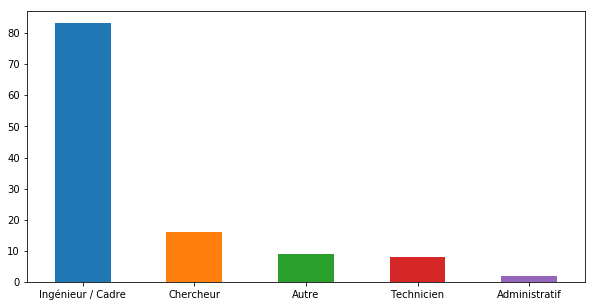

In [17]:
## D0xxFUN DILLPrivatePublic
libelle_fonction='Quelle est votre fonction ?'
printBold(libelle_fonction)
donnees_fonction=donnees.loc[:,libelle_fonction]
liste_fonction=list(set(donnees_fonction))
del liste_fonction[liste_fonction.index(np.nan)]
dico_fonction={}
for fonction in liste_fonction:
    dico_fonction[fonction]=len(donnees.loc[donnees.loc[:,libelle_fonction]==fonction,libelle_fonction])

plt.figure(figsize=(10,5))
pd.Series(dico_fonction).sort_values(ascending=False).plot(kind='bar',rot=0)
plt.show()

**Quelle est votre discipline ?**

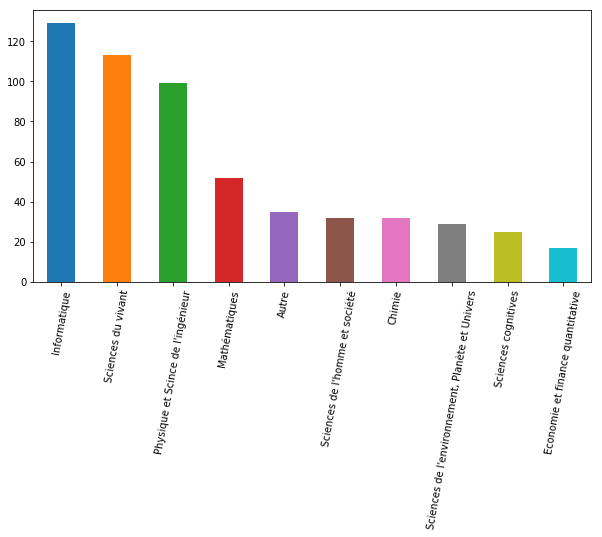

In [18]:
## DILLDiscipline
libelle_discipline="Quelle est votre discipline ? "
printBold(libelle_discipline.strip())

chimie=donnees.loc[donnees.loc[:,libelle_discipline+'[Chimie]']=='Oui',libelle_discipline+'[Chimie]'].count()
physique_SI=donnees.loc[donnees.loc[:,libelle_discipline+"[Physique, sciences de l'ingénieur]"]=='Oui',libelle_discipline+"[Physique, sciences de l'ingénieur]"].count()
informatique=donnees.loc[donnees.loc[:,libelle_discipline+"[Informatique]"]=='Oui',libelle_discipline+"[Informatique]"].count()
maths=donnees.loc[donnees.loc[:,libelle_discipline+"[Mathématiques]"]=='Oui',libelle_discipline+"[Mathématiques]"].count()
science_cognitives=donnees.loc[donnees.loc[:,libelle_discipline+"[Sciences cognitives]"]=='Oui',libelle_discipline+"[Sciences cognitives]"].count()
environnement_planete_univers=donnees.loc[donnees.loc[:,libelle_discipline+"[Sciences de l'environnement, Planète et Univers]"]=='Oui',libelle_discipline+"[Sciences de l'environnement, Planète et Univers]"].count()
sciences_du_vivant=donnees.loc[donnees.loc[:,libelle_discipline+"[Sciences du Vivant (Biologie, Sciences agricoles, Sciences pharmaceutiques,  Alimentation, Médecine, ...)]"]=='Oui',libelle_discipline+"[Sciences du Vivant (Biologie, Sciences agricoles, Sciences pharmaceutiques,  Alimentation, Médecine, ...)]"].count()
homme_société=donnees.loc[donnees.loc[:,libelle_discipline+"[Sciences de l'Homme et Société]"]=='Oui',libelle_discipline+"[Sciences de l'Homme et Société]"].count()
economie=donnees.loc[donnees.loc[:,libelle_discipline+"[Économie et finance quantitative]"]=='Oui',libelle_discipline+"[Économie et finance quantitative]"].count()
autre=donnees.loc[donnees.loc[:,"Quelle est votre discipline ? [Autre]"]!=np.nan,libelle_discipline+"[Autre]"].count()

discipline=["Chimie","Physique et Scince de l'ingénieur","Informatique","Mathématiques","Sciences cognitives","Sciences de l'environnement, Planète et Univers","Sciences du vivant","Sciences de l'homme et société","Economie et finance quantitative","Autre"]
nbr_discipline=[chimie,physique_SI,informatique,maths,science_cognitives,environnement_planete_univers,sciences_du_vivant,homme_société,economie,autre]
plt.figure(figsize=(10,5))
pd.Series(nbr_discipline,index=discipline).sort_values(ascending=False).plot(kind='bar',rot=80)
plt.show()

**Quel est votre niveau de connaissance de :**

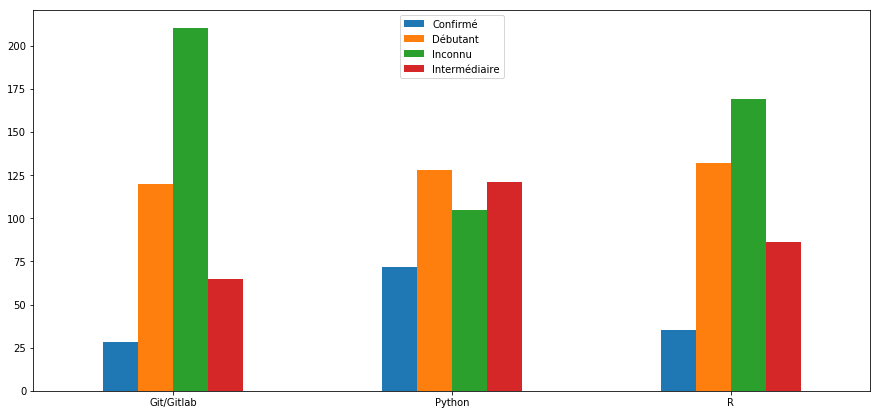

In [19]:
## DILLlevel
libelle_niveau_info='Quel est votre niveau de connaissance de :  '
printBold(libelle_niveau_info.strip())

liste_niveau_info=["Inconnu","Débutant","Intermédiaire","Confirmé"]

donnees_python=donnees.loc[:,libelle_niveau_info+'[Langage Python]']
dico_python={}
for niveau in liste_niveau_info:
    dico_python[niveau]=len(donnees.loc[donnees.loc[:,libelle_niveau_info+'[Langage Python]']==niveau,libelle_niveau_info+'[Langage Python]'])
python=pd.Series(dico_python)

donnees_R=donnees.loc[:,'Quel est votre niveau de connaissance de :  [langage R]']
dico_R={}
for niveau in liste_niveau_info:
    dico_R[niveau]=len(donnees.loc[donnees.loc[:,libelle_niveau_info+'[langage R]']==niveau,libelle_niveau_info+'[langage R]'])
R=pd.Series(dico_R)

donnees_git=donnees.loc[:,'Quel est votre niveau de connaissance de :  [Git / Gitlab]']
dico_git={}
for niveau in liste_niveau_info:
    dico_git[niveau]=len(donnees.loc[donnees.loc[:,libelle_niveau_info+'[Git / Gitlab]']==niveau,libelle_niveau_info+'[Git / Gitlab]'])
git=pd.Series(dico_git)

pd.DataFrame({"Git/Gitlab":git,"Python":python,"R":R}).T.plot(kind='bar',figsize=(15,7),rot=0)
plt.legend(loc='upper center')
plt.show()

**Travaillez-vous dans un institut de recherche ou une université ?**

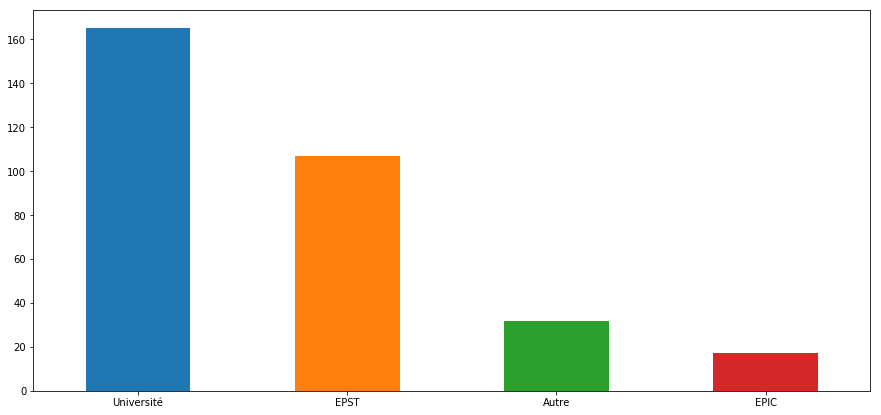

**Précisez quelle EPST (établissement public à caractère scientifique et technologique)**

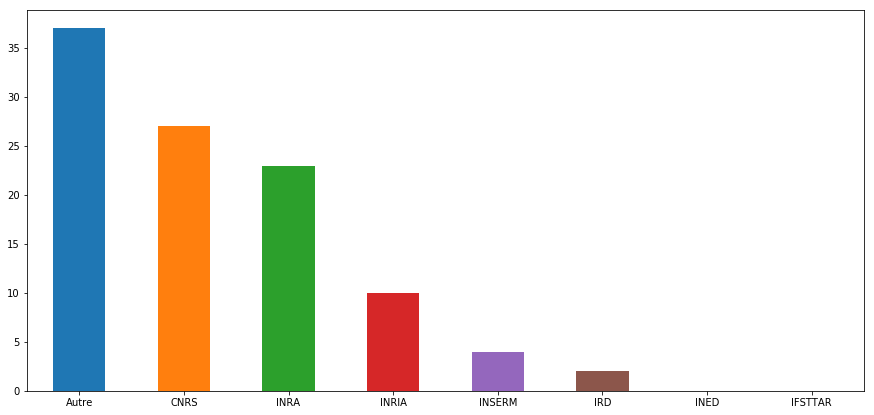

Autres :

['LORIA', 'Sustainable Research Unit - REHABS (Nelson Mandela University & Univ. de Lyon)', 'LAAS', 'LEGOS/OBS-MIP', 'IRCGN', 'LAMIH', 'GEPEA', 'SCK-CEN, Belgique', 'VetAgro Sup', 'IMT Atlantique', 'IGF ', 'EPHE (Ecole Pratique des Hautes Etudes)', 'IADI', 'FEMTO-ST', 'CRCA', 'ENSAM', 'Arts et métiers ParisTech', 'National Institute of Standards and Technology ; Centre de Recherche en Automation de Nancy', 'Institut du Cerveau (ICM)', 'CEA/LITEN/LCO GRENOBLE', 'CEA Grenoble', 'Agrocampus', 'Sorbonne Université', 'CEA LETI', 'IRIT', 'ENSAM PARIS', 'CRBM', 'Collège de France', 'PhLAM', 'UTINAM', 'Institut de recherche en informatique de Toulouse (IRIT)', 'Ecole Nationale Supérieure des Arts et Métiers', 'Laboratoire TIMC-IMAG (Grenoble, UGA)', "Laboratoire d'Aérologie", "Grande École d'ingénieur (ESPCI Paris- Université PSL)", 'Paris Brain Institute', "Centre d'immunologie Marseille-Luminy"]


**Précisez quelle EPIC (établissements publics industriels et commerciaux)**

["retraité de l'ONERA", 'CEA-LETI', 'CEA', 'BRGM', 'CEA', 'CEA', 'CEA', 'IFPEN', 'CERFACS', 'INRAE', 'ONERA', 'CEA', 'Neurosys', 'CEA', 'CEA']


In [20]:
## DILLEPST
libelle_organisme="Si vous travaillez dans un institut de recherche ou une université, précisez son type et son nom (acronyme si possible) "
printBold("Travaillez-vous dans un institut de recherche ou une université ?")

EPST=donnees.loc[donnees.loc[:,libelle_organisme+"[EPST (établissement public à caractère scientifique et technologique)]"]=='Oui',libelle_organisme+"[EPST (établissement public à caractère scientifique et technologique)]"].count()
EPIC=donnees.loc[donnees.loc[:,libelle_organisme+"[EPIC (établissements publics industriels et commerciaux)]"]=='Oui',libelle_organisme+"[EPIC (établissements publics industriels et commerciaux)]"].count()
Universite=donnees.loc[donnees.loc[:,libelle_organisme+"[Université]"]=='Oui',libelle_organisme+"[Université]"].count()
autre=donnees.loc[donnees.loc[:,libelle_organisme+"[Autre]"]=='Oui',libelle_organisme+"[Autre]"].count()

etablissement=["EPST","EPIC","Université","Autre"]
nbr_etablissement=[EPST,EPIC,Universite,autre]
pd.Series(nbr_etablissement,index=etablissement).sort_values(ascending=False).plot(kind='bar',figsize=(15,7),rot=0)
plt.show()

liste_EPST=list(donnees.loc[:,libelle_organisme+"[EPST (établissement public à caractère scientifique et technologique)][Commentaire]"].dropna())
dico_EPST={"INRA":0,"CNRS":0,"IFSTTAR":0,"INED":0,"INRIA":0,"INSERM":0,"IRD":0,"Autre":0}
liste_autres=[]
for n_EPST in liste_EPST:
    if "INRA" in n_EPST.upper():
        dico_EPST["INRA"]+=1
    elif "CNRS" in n_EPST.upper():
        dico_EPST["CNRS"]+=1
    elif "IFSTTAR" in n_EPST.upper():
        dico_EPST["IFSTTAR"]+=1
    elif "INED" in n_EPST.upper():
        dico_EPST["INED"]+=1
    elif "INRIA" in n_EPST.upper():
        dico_EPST["INRIA"]+=1
    elif "INSERM" in n_EPST.upper():
        dico_EPST["INSERM"]+=1
    elif "IRD" in n_EPST.upper():
        dico_EPST["IRD"]+=1
    else:
        liste_autres+=[n_EPST]
        dico_EPST["Autre"]+=1
printBold ("Précisez quelle EPST (établissement public à caractère scientifique et technologique)")        
pd.Series(dico_EPST).sort_values(ascending=False).plot(kind="bar",figsize=(15,7),rot=0)
plt.show()
print("Autres :\n")
print(liste_autres)
liste_EPIC=list(donnees.loc[:,libelle_organisme+"[EPIC (établissements publics industriels et commerciaux)][Commentaire]"].dropna())
printBold ("Précisez quelle EPIC (établissements publics industriels et commerciaux)")
print(liste_EPIC)



**Précisez quelle Université**

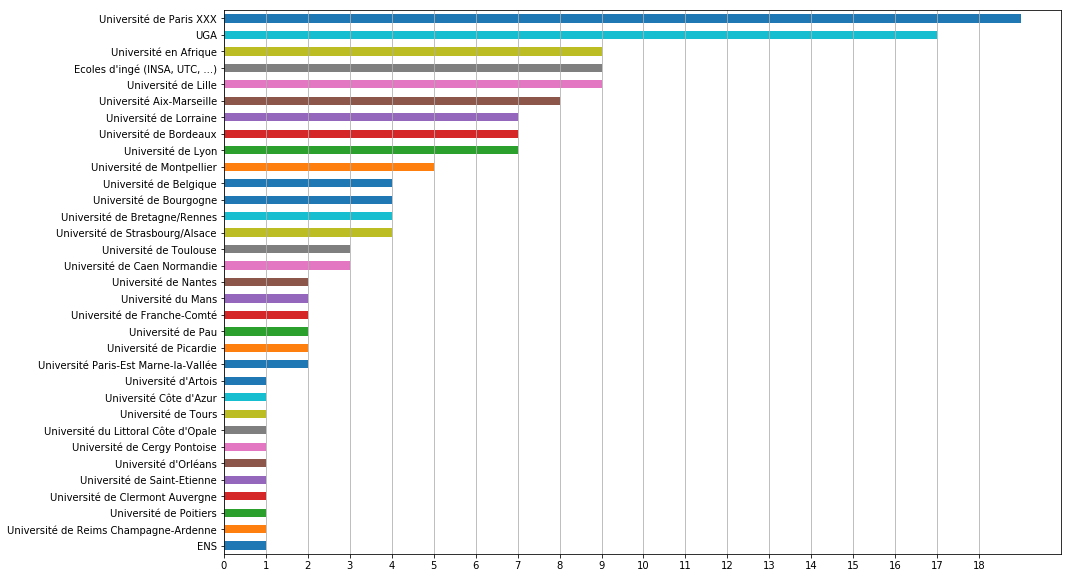

Autres :

['Université Passo Fundo', 'Trinity College Dublin, Botany Department', 'McGill', 'Paul Sabatier ISAE SUPAERO', 'UFRGS', 'UP', 'UL', 'université paul sabatier', 'uB', 'GRESEC', 'UM1', 'University of Buea - UB', 'SU', 'Pontificia Universidad Católica de Valparaíso', 'Technical University of Manabi (UTM)', 'UdS-CNRS - UMR 7140 - LSMIS', 'HESAM']


In [21]:
printBold ("Précisez quelle Université")
dico_UNIV={"UGA":0,"Université de Toulouse":0,"Université de Bordeaux":0,"Université de Bourgogne":0,
           "Université de Cergy Pontoise":0,"Université de Nantes":0,
           "Université de Lorraine":0,"Université de Lille":0,"Université de Bretagne/Rennes":0,
           "Université de Paris XXX":0,"Université de Montpellier":0,
           "Université du Mans":0,"Université Aix-Marseille":0,"Université de Tours":0,
           "Université de Lyon":0,"Université de Strasbourg/Alsace":0,
           "Université de Clermont Auvergne":0,"Université de Poitiers":0,"Université Côte d'Azur":0,
           "Université de Caen Normandie":0,"Université de Pau":0,"Ecoles d'ingé (INSA, UTC, ...)":0,
           "Université de Reims Champagne-Ardenne":0,"Université de Picardie":0,"Université de Franche-Comté":0,
           "Université d'Orléans":0,"Université de Belgique":0,"Université en Afrique":0,
           "Université du Littoral Côte d'Opale":0,"Université Paris-Est Marne-la-Vallée":0,
           'ENS':0,"Université de Saint-Etienne":0,"Université d'Artois":0
          }
liste_univ=list(donnees.loc[:,libelle_organisme+"[Université][Commentaire]"].dropna())
liste_univ_autres=[]
for n_UNIV in liste_univ:
    if "aix" in n_UNIV.lower() or "marseille" in n_UNIV.lower() or "amu" in n_UNIV.lower():
        dico_UNIV["Université Aix-Marseille"]+=1
    elif "azur" in n_UNIV.lower():
        dico_UNIV["Université Côte d'Azur"]+=1
    elif "artois" in n_UNIV.lower():
        dico_UNIV["Université d'Artois"]+=1
    elif "bordeaux" in n_UNIV.lower():
        dico_UNIV["Université de Bordeaux"]+=1
    elif "bourgogne" in n_UNIV.lower() or "ubfc" in n_UNIV.lower():
        dico_UNIV["Université de Bourgogne"]+=1
    elif "bretagne" in n_UNIV.lower() or "rennes" in n_UNIV.lower() or "ubs" in n_UNIV.lower():
        dico_UNIV["Université de Bretagne/Rennes"]+=1
    elif "caen" in n_UNIV.lower() or "normandie" in n_UNIV.lower():
        dico_UNIV["Université de Caen Normandie"]+=1    
    elif "cergy" in n_UNIV.lower() or "pontoise" in n_UNIV.lower():
        dico_UNIV["Université de Cergy Pontoise"]+=1
    elif "clermont" in n_UNIV.lower() or "auvergne" in n_UNIV.lower():
        dico_UNIV["Université de Clermont Auvergne"]+=1
    elif "grenoble" in n_UNIV.lower() or "uga" in n_UNIV.lower():
        dico_UNIV["UGA"]+=1
    elif "franche" in n_UNIV.lower():
        dico_UNIV["Université de Franche-Comté"]+=1
    elif "lille" in n_UNIV.lower():
        dico_UNIV["Université de Lille"]+=1
    elif "littoral côte d'opale" in n_UNIV.lower() or "ULCO" in n_UNIV.lower():
        dico_UNIV["Université du Littoral Côte d'Opale"]+=1
    elif "lorraine" in n_UNIV.lower():
        dico_UNIV["Université de Lorraine"]+=1
    elif "lyon" in n_UNIV.lower() or "ucbl" in n_UNIV.lower():
        dico_UNIV["Université de Lyon"]+=1
    elif "mans" in n_UNIV.lower():
        dico_UNIV["Université du Mans"]+=1
    elif "montpellier" in n_UNIV.lower():
        dico_UNIV["Université de Montpellier"]+=1
    elif "marne-la-vallée" in n_UNIV.lower() or "gustave eiffel" in n_UNIV.lower()  or "paris-est" in n_UNIV.lower():
        dico_UNIV["Université Paris-Est Marne-la-Vallée"]+=1
    #elif "nanterre" in n_UNIV.lower():
    #    dico_UNIV["Université de Paris-Nanterre"]+=1
    elif "nantes" in n_UNIV.lower():
        dico_UNIV["Université de Nantes"]+=1
    elif "orléans" in n_UNIV.lower() or "orleans" in n_UNIV.lower():
        dico_UNIV["Université d'Orléans"]+=1
    elif ("paris" in n_UNIV.lower() or "sorbonne" in n_UNIV.lower() or "upmc" in n_UNIV.lower() or "nanterre" in n_UNIV.lower()
            or "uspn" in n_UNIV.lower()):
        dico_UNIV["Université de Paris XXX"]+=1
    elif "picardie" in n_UNIV.lower() or "picardy" in n_UNIV.lower() or "upjv" in n_UNIV.lower() or "amiens" in n_UNIV.lower():
        dico_UNIV["Université de Picardie"]+=1
    elif "poitiers" in n_UNIV.lower():
        dico_UNIV["Université de Poitiers"]+=1
    elif "reims" in n_UNIV.lower() or "champagne" in n_UNIV.lower() or "urca" in n_UNIV.lower():
        dico_UNIV["Université de Reims Champagne-Ardenne"]+=1
    elif "strasbourg" in n_UNIV.lower() or "alsace" in n_UNIV.lower():
        dico_UNIV["Université de Strasbourg/Alsace"]+=1
    elif "etienne" in n_UNIV.lower():
        dico_UNIV["Université de Saint-Etienne"]+=1
    elif "toulouse" in n_UNIV.lower():
        dico_UNIV["Université de Toulouse"]+=1
    elif "tours" in n_UNIV.lower():
        dico_UNIV["Université de Tours"]+=1
    elif ("insa" in n_UNIV.lower() or "utc" in n_UNIV.lower() or "polytechnique" in n_UNIV.lower() 
        or "ensma" in n_UNIV.lower() or "université technologique de" in n_UNIV.lower()
         or 'eeats' in n_UNIV.lower() or 'mines' in n_UNIV.lower() or "imt atlantique" in n_UNIV.lower()
         or "ISAE SUPAE" in n_UNIV.lower()):
        dico_UNIV["Ecoles d'ingé (INSA, UTC, ...)"]+=1
    elif "belgique" in n_UNIV.lower() or "liege" in n_UNIV.lower() or "liège" in n_UNIV.lower():
        dico_UNIV["Université de Belgique"]+=1
    elif ("ain temouchent" in n_UNIV.lower() or "maroc" in n_UNIV.lower() or "sidi mohammed ben abdellah" in n_UNIV.lower()
          or "casablanca" in n_UNIV.lower() or "hassan" in n_UNIV.lower() or "ouaga" in n_UNIV.lower()
          or "oran" in n_UNIV.lower() or "togo" in n_UNIV.lower()):
        dico_UNIV["Université en Afrique"]+=1
    #doivent passer après les autres
    elif "de pau" in n_UNIV.lower() or "uppa" in n_UNIV.lower():
        dico_UNIV["Université de Pau"]+=1
    elif "ens" in n_UNIV.lower():
        dico_UNIV["ENS"]+=1

    else:
        liste_univ_autres+=[n_UNIV]
#        dico_UNIV["Autre"]+=1
pd.Series(dico_UNIV).sort_values(ascending=True).plot(xticks=np.arange(0,int(max(dico_UNIV.values())),1),kind="barh",figsize=(15,10),rot=0)
plt.grid(axis='x')
plt.show()
print("Autres :\n")
print(liste_univ_autres)

**Sur quel système d'exploitation travaillez-vous ?**

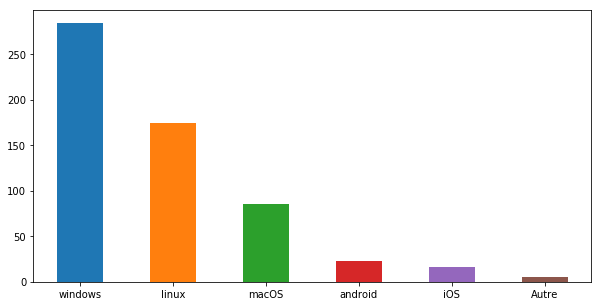

In [22]:
## ILLOs
libelle_os="Sur quel système d'exploitation travaillez-vous ?"
printBold(libelle_os)
linux=donnees.loc[donnees.loc[:,libelle_os+" [Linux]"]=='Oui',libelle_os+" [Linux]"].count()
windows=donnees.loc[donnees.loc[:,libelle_os+" [Windows]"]=='Oui',libelle_os+" [Windows]"].count()
macOS=donnees.loc[donnees.loc[:,libelle_os+" [macOS]"]=='Oui',libelle_os+" [macOS]"].count()
Android=donnees.loc[donnees.loc[:,libelle_os+" [Android]"]=='Oui',libelle_os+" [Android]"].count()
iOS=donnees.loc[donnees.loc[:,libelle_os+" [iOS]"]=='Oui',libelle_os+" [iOS]"].count()
autre=donnees.loc[donnees.loc[:,libelle_os+" [Autre]"]=='Oui',libelle_os+" [Autre]"].count()

OS=["linux","windows","macOS","android","iOS","Autre"]
nbr_OS=[linux,windows,macOS,Android,iOS,autre]
pd.Series(nbr_OS,index=OS).sort_values(ascending=False).plot(kind='bar',figsize=(10,5),rot=0)
plt.show()